In [74]:
import numpy as np
c = np.random.rand(3, 3)

In [75]:
np.empty([dim*3 for dim in c.shape])

array([[5.03304009e-038, 2.51949435e-091, 7.67112743e+170,
        1.46914166e+195, 1.15941272e-152, 1.14365493e+243,
        5.98129759e-154, 2.88281490e+213, 2.47379808e-091],
       [1.18600496e-259, 3.65881462e+233, 3.12577052e-085,
        2.42776666e-154, 3.64913061e+233, 6.01346954e-154,
        4.47593816e-091, 7.04142211e-009, 3.28029843e-085],
       [2.46598537e-154, 5.98155940e-154, 3.74168656e+233,
        2.21002231e+214, 7.49511203e+247, 1.96677039e-259,
        2.25563609e-153, 1.14511381e+243, 2.52302437e-258],
       [2.44406035e-154, 2.93573416e+222, 6.91489856e+252,
        6.01334668e-154, 1.87725413e-009, 4.71525094e+180,
        5.91842484e-085, 2.46598537e-154, 2.42767675e-154],
       [7.82257179e+250, 6.06452500e-309, 1.17518756e+180,
        1.02189777e-152, 5.83439517e+252, 2.31462116e-152,
        1.21697729e-152, 7.14892657e+227, 2.66064968e-260],
       [2.86523810e+161, 2.76455339e+257, 9.78381024e+199,
        2.02763010e+174, 4.27255622e+180, 7.3395303

In [76]:

import itertools
for ind in filter(lambda x: sum(x)==3, itertools.product(*[range(l) for l in (4,5,6)])):
    print(ind)

(0, 0, 3)
(0, 1, 2)
(0, 2, 1)
(0, 3, 0)
(1, 0, 2)
(1, 1, 1)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)
(3, 0, 0)


In [77]:
import numpy as np
import itertools
import operator
from copy import deepcopy
import math

def poly2d_mul(c1, c2):
    ans = np.zeros([c1.shape[i]+c2.shape[i] -1 for i in range(c1.ndim)])
    for k in filter(lambda k: all(k[i]+c2.shape[i]<=ans.shape[i] for i in range(c.ndim) ),
                    itertools.product(*[range(l) for l in ans.shape]) ):
        ans[ 
            k[0]:k[0]+c2.shape[0], 
            k[1]:k[1]+c2.shape[1]] += c1[k]*c2
    return ans


def poly2d_pow_pw_integer(c, pw):
    if pw==0:
        return np.ones([1,1])
    ans = np.zeros([(dimlen-1)*pw+1 for dimlen in c.shape])
    ans[
        :c.shape[0], 
        :c.shape[1]] = c
    if pw==1:
        return ans
    for _ in range(pw-1):
        lastans = deepcopy(ans)
        ans.fill(0)
        for k in filter(lambda k: all(k[i]+c.shape[i]<=ans.shape[i] for i in range(c.ndim) ),
                        itertools.product(*[range(l) for l in ans.shape]) ):
            ans[ 
                k[0]:k[0]+c.shape[0], 
                k[1]:k[1]+c.shape[1]] += lastans[k]*c
    return ans
def poly2d_pow_Newton_Binomial(c, pw): # FIXME: poly2d_pow_Newton_Binomial(  np.asarray([[0,1,], [1,0,]]), pw=5) does not return right ans
    ans = np.zeros([pw+1, pw+1])
    for pw1 in range(pw):
        pw2 = pw - pw1
        ans[pw1,pw2] = math.comb(pw, pw1) * (c[1,0]**pw1) * (c[0,1]**pw2)
    return ans

def poly_pow_f0_nonzero(c, pw):
    ans = np.zeros([(dim-1)*pw+1 for dim in c.shape])
    ans[tuple([0]*c.ndim)] = c.item(0)**pw # c.item(0) = f_0
    for absk in range(1, sum((dim-1)*pw for dim in c.shape) +1):
        for k in filter(lambda x: sum(x)==absk, 
                        itertools.product(*[range(l) for l in ans.shape]) ):
            for kp in filter(lambda kp: all(i >= 0 and i<c.shape[ind] for ind, i in enumerate(map(operator.sub, k, kp))) and k!=kp ,
                             itertools.product(*[range(l) for l in ans.shape]) ):
                abskp = sum(kp)
                ans[k] += (pw*(absk-abskp)-abskp) * c[tuple(map(operator.sub, k, kp))] * ans[kp]
            ans[k] /= absk * c.item(0)
    return ans

def poly2d_composition(c_of_z_in_y, c_of_y1_in_x, c_of_y2_in_x): # z(y1(x1, x2), y2(x1, x2)) = z(y), where y=y(x)=(y1(x1,x2), y2(x1,x2))
    ky1_max, ky2_max = c_of_z_in_y.shape
    ky1_max, ky2_max = ky1_max-1, ky2_max-1
    
    y1_kx1_max, y1_kx2_max = c_of_y1_in_x.shape
    y1_kx1_max, y1_kx2_max = y1_kx1_max-1, y1_kx2_max-1
    y2_kx1_max, y2_kx2_max = c_of_y2_in_x.shape
    y2_kx1_max, y2_kx2_max = y2_kx1_max-1, y2_kx2_max-1
    
    c_of_z_in_x = np.zeros([
        ky1_max*y1_kx1_max+ky2_max*y2_kx1_max+1, 
        ky1_max*y1_kx2_max+ky2_max*y2_kx2_max+1])
    
    for ky1, ky2 in itertools.product(*[range(l) for l in c_of_z_in_y.shape]) :
        print(ky1, ky2)
        temp = c_of_z_in_y[ky1, ky2] * poly2d_mul( 
            poly2d_pow_pw_integer(c_of_y1_in_x, ky1), 
            poly2d_pow_pw_integer(c_of_y2_in_x, ky2) )
        x1_span, x2_span = temp.shape
        c_of_z_in_x[:x1_span, :x2_span] += temp
    return c_of_z_in_x

In [42]:
c = np.asarray([[2,3,], [1,0,]])
poly2d_pow_pw_integer(c, 3) # one can check this by wolframalpha: Power[\(40)2 + 3 x_2 + x_1\(41),3]
# poly1d_pow_pw_integer(np.asarray([1,1]), 3)

array([[ 8., 36., 54., 27.],
       [12., 36., 27.,  0.],
       [ 6.,  9.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [40]:
poly2d_mul(
    np.asarray([[2,-1,2], [1,0,0]]), 
    np.asarray([[2,1,], [3,0,]])) # one can check this by wolframalpha: (2 - x_2 + 2Power[\(40)x_2\(41),2]+ x_1) * (2+x_2+3*x_1)

array([[ 4.,  0.,  3.,  2.],
       [ 8., -2.,  6.,  0.],
       [ 3.,  0.,  0.,  0.]])

In [53]:
max( 5*np.inf, 500000000)

inf

In [67]:

class Poly2d:
    def __init__(self, poly2d_arr, uncertain_from_ord:int=np.inf):
        self._arr = poly2d_arr
        self._uncertain_from_ord = uncertain_from_ord
        
    @property
    def uncertain_from_ord(self):
        return self._uncertain_from_ord
    
    def __add__(self, other):
        c1, c2 = self._arr, other._arr
        ans = np.zeros([max(c1.shape[i], c2.shape[i] ) for i in range(c1.ndim)])
        for c in [c1, c2]:
            clen1, clen2 = c.shape
            ans[:clen1, :clen2] += c
        return Poly2d(ans, uncertain_from_ord=min(self.uncertain_from_ord, other.uncertain_from_ord) )
    
    def __sub__(self, other): 
        c1, c2 = self._arr, other._arr
        ans = np.zeros([max(c1.shape[i], c2.shape[i] ) for i in range(c1.ndim)])
        
        clen1, clen2 = c1.shape
        ans[:clen1, :clen2] += c1
        clen1, clen2 = c2.shape
        ans[:clen1, :clen2] -= c2
        return Poly2d(ans, uncertain_from_ord=min(self.uncertain_from_ord, other.uncertain_from_ord) )
    
    def __mul__(self, other):
        c1, c2 = self._arr, other._arr
        ans = np.zeros([c1.shape[i]+c2.shape[i] -1 for i in range(c1.ndim)])
        for k in filter(lambda k: all(k[i]+c2.shape[i]<=ans.shape[i] for i in range(c1.ndim) ),
                        itertools.product(*[range(l) for l in ans.shape]) ):
            ans[ 
                k[0]:k[0]+c2.shape[0], 
                k[1]:k[1]+c2.shape[1]] += c1[k]*c2
        return Poly2d(ans, uncertain_from_ord=min(self.uncertain_from_ord, other.uncertain_from_ord) )
    
    def __pow__(self, pw):
        if pw==0:
            return Poly2d( np.ones([1,1]), uncertain_from_ord=np.inf  ) 
        elif pw==1:
            return Poly2d( np.copy(self._arr), uncertain_from_ord=self.uncertain_from_ord )
        return self**(pw-1) * self
    
    def __matmul__(self, other): # composition, # z(y1(x1, x2), y2(x1, x2)) = z(y), where y=y(x)=(y1(x1,x2), y2(x1,x2))
        c_of_z_in_y = self._arr
        y1_in_x, y2_in_x = other
        c_of_y1_in_x, c_of_y2_in_x = y1_in_x._arr, y2_in_x._arr
        
        ky1_max, ky2_max = c_of_z_in_y.shape
        ky1_max, ky2_max = ky1_max-1, ky2_max-1

        y1_kx1_max, y1_kx2_max = c_of_y1_in_x.shape
        y1_kx1_max, y1_kx2_max = y1_kx1_max-1, y1_kx2_max-1
        y2_kx1_max, y2_kx2_max = c_of_y2_in_x.shape
        y2_kx1_max, y2_kx2_max = y2_kx1_max-1, y2_kx2_max-1

        c_of_z_in_x = np.zeros([
            ky1_max*y1_kx1_max+ky2_max*y2_kx1_max+1, 
            ky1_max*y1_kx2_max+ky2_max*y2_kx2_max+1])

        for ky1, ky2 in itertools.product(*[range(l) for l in c_of_z_in_y.shape]) :
            temp = c_of_z_in_y[ky1, ky2] * (y1_in_x**ky1 * y2_in_x**ky2)._arr
            x1_span, x2_span = temp.shape
            c_of_z_in_x[:x1_span, :x2_span] += temp
            
        lowest_nonzero_ord = np.inf
        if self.uncertain_from_ord != np.inf:
            for kx1, kx2 in itertools.product(*[range(l) for l in c_of_y1_in_x.shape]) :
                if c_of_y1_in_x[kx1, kx2] != 0:
                    lowest_nonzero_ord = min(kx1+kx2, lowest_nonzero_ord)
            for kx1, kx2 in itertools.product(*[range(l) for l in c_of_y2_in_x.shape]) :
                if c_of_y2_in_x[kx1, kx2] != 0:
                    lowest_nonzero_ord = min(kx1+kx2, lowest_nonzero_ord)
            uncertain_self = lowest_nonzero_ord * self.uncertain_from_ord
            uncertain_ans = min( uncertain_self, y1_in_x.uncertain_from_ord, y2_in_x.uncertain_from_ord )
        else:
            uncertain_ans = min( y1_in_x.uncertain_from_ord, y2_in_x.uncertain_from_ord )
            
        return Poly2d( c_of_z_in_x, uncertain_from_ord=uncertain_ans )

In [62]:
c = Poly2d( np.asarray([[2,-1,2], [1,0,0]]), ) * Poly2d( np.asarray([[2,1,], [3,0,]]) )  # one can check this by wolframalpha: (2 - x_2 + 2Power[\(40)x_2\(41),2]+ x_1) * (2+x_2+3*x_1)

In [70]:
c = Poly2d( np.asarray([[2,1], [1,3], [0,-1]]) ) @ (  Poly2d(np.asarray([[0,1], [2,1]])), Poly2d(np.asarray([[0,3], [-1,0]]))   )
c._arr

array([[  2.,   4.,   9.,  -3.],
       [  1.,  16.,  -2.,  -6.],
       [ -6., -11., -10.,  -3.],
       [  4.,   4.,   1.,   0.]])

In [72]:
# one can check this by wolframapha: (2 + y_2 + y_1 + 3 y_1 y_2 - y_1*Power[\(40)y_2\(41),2]); y_1 = x_1 +2x_2 + x_1 x_2 + 2Power[\(40)x_2\(41),2]+3Power[\(40)x_2\(41),3]+3 x_1 Power[\(40)x_2\(41),2]+4 x_1 Power[\(40)x_2\(41),3]; y_2 = -x_2+3x_1+x_1 x_2
c = Poly2d( np.asarray( [[2,1,0], [1,3,-1]] ) ) @ (  Poly2d(np.asarray([[0,2,2,3], [1,1,3,4]])), Poly2d(np.asarray([[0,-1], [3,1]]))   )
c._arr

array([[  2.,   1.,  -4.,  -5., -11.,  -3.],
       [  4.,  17.,  35.,  43.,  16.,   2.],
       [  9.,   0.,   8.,  24.,  22.,   5.],
       [ -9., -15., -34., -55., -27.,  -4.]])

In [8]:
poly2d_pow_Newton_Binomial(  np.asarray([[0,1,], [1,0,]]), pw=5)

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0., 10.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [9]:
poly2d_pow_pw_integer( np.asarray([[0,1,], [1,0,]]), 5)

array([[ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  5.,  0.],
       [ 0.,  0.,  0., 10.,  0.,  0.],
       [ 0.,  0., 10.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [67]:
all(i >=0 for i in map(operator.sub, (1,2,0), (1,2,0)))

True

In [78]:
poly2d_composition(
    np.asarray([[0,1,0], [1,0,0]]),
    np.asarray([[0,0], [1,0]]),
    np.asarray([[0,1], [0,0]]))

0 0
0 1
0 2
1 0
1 1
1 2


array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [79]:
poly2d_composition(
    np.asarray([[2,1], [1,3], [0,-1]]),
    np.asarray([[0,1], [2,0]]),
    np.asarray([[0,3], [-1,0]]) ) # one can check this by wolframalpha: (2 + y_1 + y_2 + 3 y_1 y_2 -Power[y_1,2]*y_2); y_1 = 2x_1 +x_2; y_2 = -x_1+3x_2

0 0
0 1
1 0
1 1
2 0
2 1


array([[  2.,   4.,   9.,  -3.],
       [  1.,  15., -11.,   0.],
       [ -6.,  -8.,   0.,   0.],
       [  4.,   0.,   0.,   0.]])

In [80]:
poly2d_composition(
    np.asarray([[2,1], [1,3], [0,-1]]),
    np.asarray([[0,1], [2,1]]),
    np.asarray([[0,3], [-1,0]]) ) # one can check this by wolframalpha: (2 + y_1 + y_2 + 3 y_1 y_2 -Power[y_1,2]*y_2); y_1 = 2x_1 +x_2 + x_1 x_2; y_2 = -x_1+3x_2

0 0
0 1
1 0
1 1
2 0
2 1


array([[  2.,   4.,   9.,  -3.],
       [  1.,  16.,  -2.,  -6.],
       [ -6., -11., -10.,  -3.],
       [  4.,   4.,   1.,   0.]])

In [81]:
poly2d_composition(
    np.asarray([[2,1,0], [1,3,-1]]),
    np.asarray([[0,2], [1,1]]),
    np.asarray([[0,-1], [3,1]])) # one can check this by wolframalpha: (2 + y_2 + y_1 + 3 y_1 y_2 - y_1*Power[\(40)y_2\(41),2]); y_1 = x_1 +2x_2 + x_1 x_2; y_2 = -x_2+3x_1+x_1 x_2

0 0
0 1
0 2
1 0
1 1
1 2


array([[  2.,   1.,  -6.,  -2.],
       [  4.,  17.,  14.,   3.],
       [  9.,   0.,  -1.,   0.],
       [ -9., -15.,  -7.,  -1.]])

In [83]:
from sympy import symbols
x1, x2, y1, y2 = symbols("x_1, x_2, y_1, y_2", real=True)
z = 2 + y1+y2+3*y1*y2 - y1*y2**2
z_in_x = z.subs(y1, 2*x1+x2+x1*x2).subs(y2, -x1+3*x2 + x1*x2)
z_in_x.factor()

-x_1**3*x_2**3 + 3*x_1**3*x_2 - 2*x_1**3 - 7*x_1**2*x_2**3 - x_1**2*x_2**2 + 14*x_1**2*x_2 - 6*x_1**2 - 15*x_1*x_2**3 + 17*x_1*x_2 + x_1 - 9*x_2**3 + 9*x_2**2 + 4*x_2 + 2

(100, 100, 100)


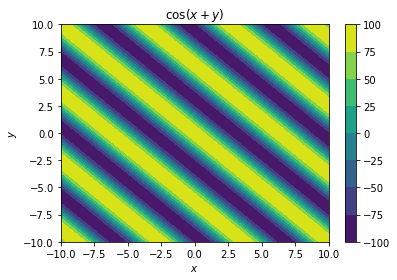

(100, 100, 100)


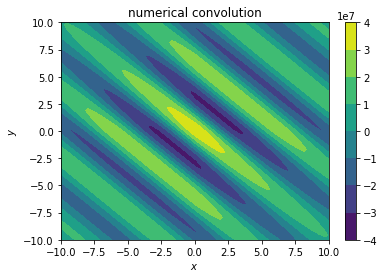

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps

# create 3D meshgrid and function cos(x+y)
bins = np.linspace(-10,10,100)
x, y, z = np.meshgrid(bins, bins, bins)
cos = np.cos(x+y)
print(cos.shape) # (100, 100, 100)

# plot projection of function on x-y plane
plt.title(r'$\cos(x+y)$')
plt.contourf(x[:,:,0], y[:,:,0], np.sum(cos,axis=2))
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

# perform convolution of function with itself
conv = sps.fftconvolve(cos, cos, mode='same')

print(conv.shape) # (100, 100, 100)

# plot projection of convolution on x-y plane
plt.title('numerical convolution')
plt.contourf(x[:,:,0], y[:,:,0], np.sum(conv,axis=2))
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()